# **STELLAR OBJECT CLASSIFICATION USING LOGISTIC REGRESSION**

**This notebook implements the Multiclass Logestic Regression to classify the Stellar objects into galaxy(0), Quasar(1) or Star(2).**

## **Importing dependancies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## **Importing Data**

In [2]:
df_1 = pd.read_csv('../input/stellar-classification-dataset-sdss17/star_classification.csv')
df_1.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# **DATA CLEANING**

### **Droping unwanted Columns**

In [3]:
df_2=df_1.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID'],axis=1)
df_2.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


# **EDA ANALYSIS**

## **Getting the names of all features**

In [4]:
for col in df_2.columns:
    print(col)

alpha
delta
u
g
r
i
z
class
redshift


### **Checking for Null Values in Data**

In [5]:
df_2.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

### **Redshift of different objects**

[Text(0.5, 0, 'Redshift'), Text(0, 0.5, 'Type of Object')]

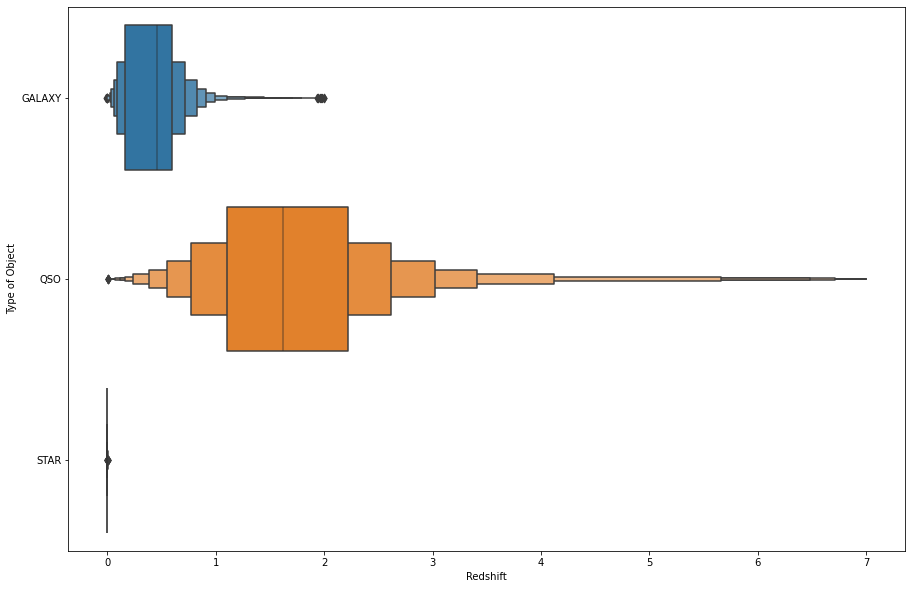

In [6]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="redshift",y="class",data=df_2).set(xlabel='Redshift',ylabel='Type of Object')

### **Energy coming through Red light from different objects.**

[Text(0.5, 0, 'Red filter'), Text(0, 0.5, 'Type of Object')]

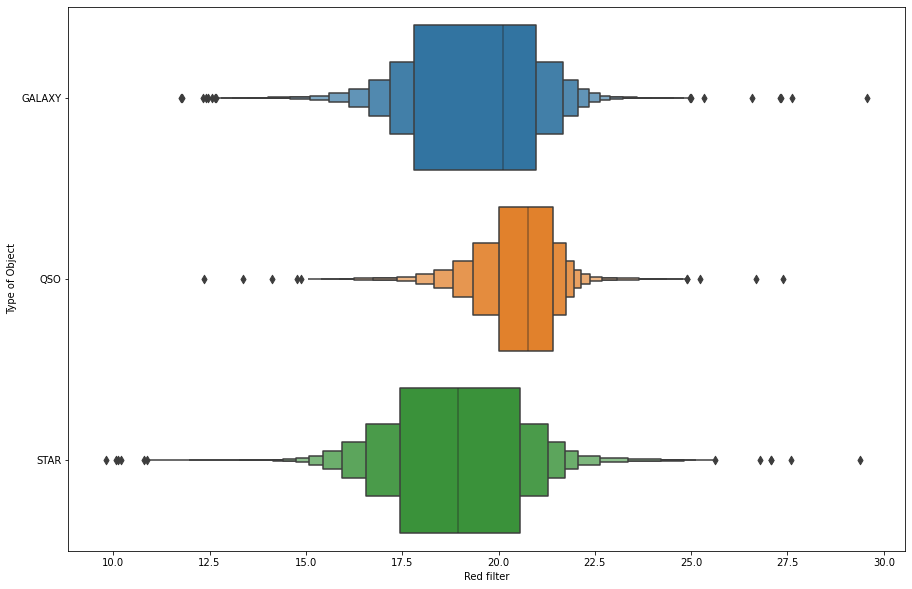

In [7]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="r",y="class",data=df_2).set(xlabel='Red filter',ylabel='Type of Object')

### **Energy coming through Near Infrared light from different objects.**

[Text(0.5, 0, 'Near Infrared filter'), Text(0, 0.5, 'Type of Object')]

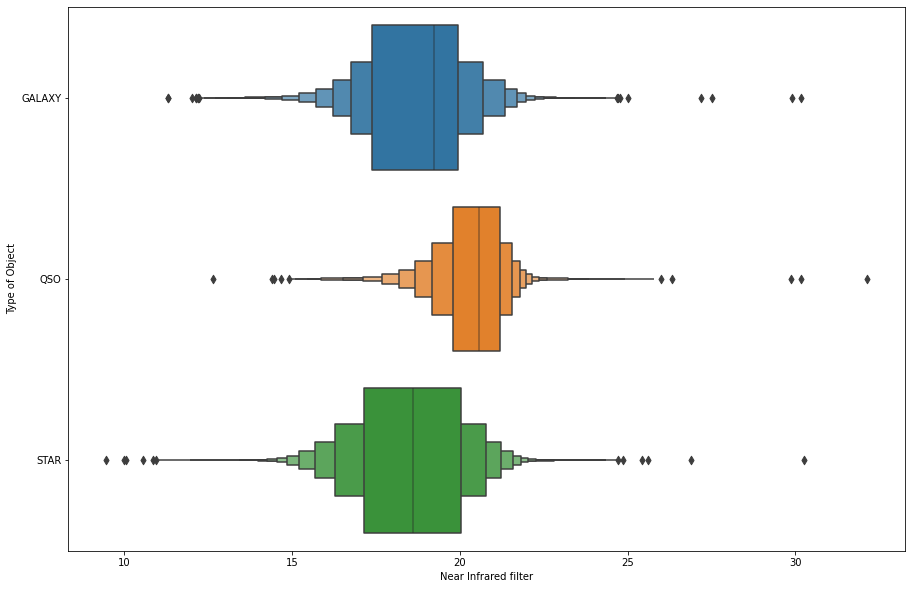

In [8]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="i",y="class",data=df_2).set(xlabel='Near Infrared filter',ylabel='Type of Object')

# **BUILDING & TRAINING OF LOGISTIC REGRESSION MODEL**

## **Defining Dependent and Independent Variables**

**Dependent variable will be everything apart from class**

In [9]:
x= df_2.drop(['class'],axis=1)
x.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


**Independent variable will be class**

In [10]:
y= df_2[['class']]
y.head()

,class
0,GALAXY
1,GALAXY
2,GALAXY
3,GALAXY
4,GALAXY


## **Splitting Test and Train data sets**

**Train and Test data is split by 80-20 ratio, also Train data is fixed**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [12]:
x_train.head()

,alpha,delta,u,g,r,i,z,redshift
31152,182.634837,39.626517,21.08952,21.06453,20.85715,20.95956,20.61033,1.036468
33499,215.771078,15.074450,19.52671,19.49507,19.54840,19.31133,19.35584,1.872981
18594,117.481295,33.523910,20.71835,18.80559,17.76449,17.30837,16.92365,0.120712
97132,241.696805,54.335655,25.45814,21.63161,20.28455,19.57242,19.02991,0.556022
56015,154.721590,45.764829,25.89776,21.68266,19.82590,19.24631,18.67415,0.387010


In [13]:
y_train.head()

,class
31152,QSO
33499,QSO
18594,GALAXY
97132,GALAXY
56015,GALAXY


## **Model Training**

In [14]:
model=LogisticRegression(max_iter=2500)
model.fit(x_train,np.ravel(y_train,order='C'))

LogisticRegression(max_iter=2500)

# **CHECKING MODEL ACCURACY**

**Confussion Matrix to visualise the model behaviour**

Text(69.0, 0.5, 'Truth')

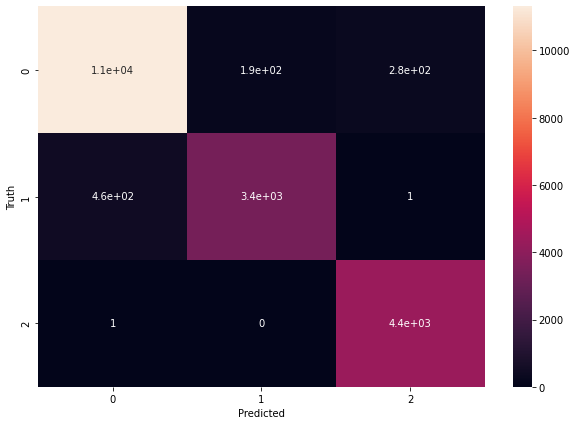

In [15]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Model Accuracy score (in %)**

In [16]:
accuracy=(model.score(x_test,y_test))*100
print('Model Accuracy:', accuracy)

Model Accuracy: 95.33500000000001
